This notebook is for M2M (multiplex to multiplex) accuracy computation. <br>
The adopted classification model is KNN (K nearest neighbor). <br>
The classification accuracy is estimated using K-fold.

# IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

In [3]:
import python_libraries.machine_learning as mlfunc
import python_libraries.data_loading as loadfunc
import python_libraries.utilities as utils

In [4]:
utils.colourblind()
NMETA = 6
#%matplotlib notebook

# LOAD DATA

In [5]:
data_path = f'{Path.cwd().parent}/data'
data_selected_path = f'{data_path}/20210716_7_plex'

In [6]:
train_exp_id = ['20210707_01', '20210707_02', '20210708_03', '20210715_01']
test_exp_id = ['20210707_03', '20210708_01', '20210708_02', '20210715_02']

In [7]:
df_train = loadfunc.load_processed_data_by_expid(data_selected_path, train_exp_id, 'raw_rb')
df_test = loadfunc.load_processed_data_by_expid(data_selected_path, test_exp_id, 'raw_rb')

In [19]:
df_test.query('Conc != "unknown" and PrimerMix == "PM7.2151"')['Exp_ID'].unique()

array(['20210707_03'], dtype=object)

In [8]:
combo_dict = {0: 'bottom_six',
              1: 'middle_six',
              2: 'top_six',
              3: 'top_mean',
              4: 'top_min'}

combo_group_id = [0, 1, 2, 3, 4]

In [9]:
df_combination = loadfunc.load_selected_combo(data_selected_path, combo_group_id, combo_dict)
df_combination = df_combination[~df_combination.index.isin(['PM7.2299'])]

# COMPUTE M2M ACCURACY

In [10]:
COMPUTE = True

if COMPUTE:

    model = [KNeighborsClassifier(n_neighbors = 10)]
    model_name = ['KNN']
    curve_types = ['raw_rb'] # 'norm_curve']

    df_accuracy_array = []
    confusion_matrix_array = []
    
    for CURVE_TYPE in curve_types:
        pms, df_accuracy_array_temp, confusion_matrix_temp = mlfunc.model_training(data_selected_path, train_exp_id,
                                                                              test_exp_id, df_combination, CURVE_TYPE,
                                                                              NMETA, model, model_name)
        df_accuracy_array.append(df_accuracy_array_temp)
        confusion_matrix_array.append(confusion_matrix_temp)

    df_accuracy = df_accuracy_array[0].copy()

df_accuracy = pd.read_csv(f'{data_selected_path}/M2M_data/df_accuracy.csv', index_col=0)


M2M accuracy computing: RAW_RB
PM7.1176
PM7.1191
PM7.1286
PM7.1294
PM7.1318
PM7.1319
PM7.1339
PM7.1430
PM7.1449
PM7.1451
PM7.1593
PM7.1595
PM7.2014
PM7.2151
PM7.2155
PM7.2203
PM7.2295
PM7.2302
PM7.2303
PM7.2601
PM7.2602
PM7.4382
PM7.4441
PM7.4443


In [11]:
confmatrix_dict = {}

for pm, array in zip(pms, confusion_matrix_array[0]):
    confmatrix_dict[pm] = array

In [12]:
# idx = list(confmatrix_dict[selected_pm][0].index)
idx = ['HAdV', 'HCoV-229E', 'HCoV-HKU1','HCoV-NL63', 
       'HCoV-OC43', 'SARS-CoV-2', 'MERS']

# CONFUSION MATRIX

In [13]:
selected_pm = 'PM7.1593'
arr = np.array(confmatrix_dict[selected_pm])[0]
arr_perc = arr / arr.sum(axis=1).reshape(-1, 1)
arr_perc

array([[0.99852507, 0.        , 0.00147493, 0.        , 0.        ,
        0.        , 0.        ],
       [0.00425532, 0.41985816, 0.10780142, 0.45957447, 0.00851064,
        0.        , 0.        ],
       [0.02079002, 0.        , 0.74428274, 0.        , 0.23492723,
        0.        , 0.        ],
       [0.0085592 , 0.05991441, 0.2467903 , 0.65905849, 0.0256776 ,
        0.        , 0.        ],
       [0.03362832, 0.        , 0.67079646, 0.        , 0.29557522,
        0.        , 0.        ],
       [0.        , 0.12407681, 0.00590842, 0.03545052, 0.        ,
        0.12555391, 0.70901034],
       [0.00267738, 0.07095047, 0.0107095 , 0.0227577 , 0.        ,
        0.00669344, 0.88621151]])

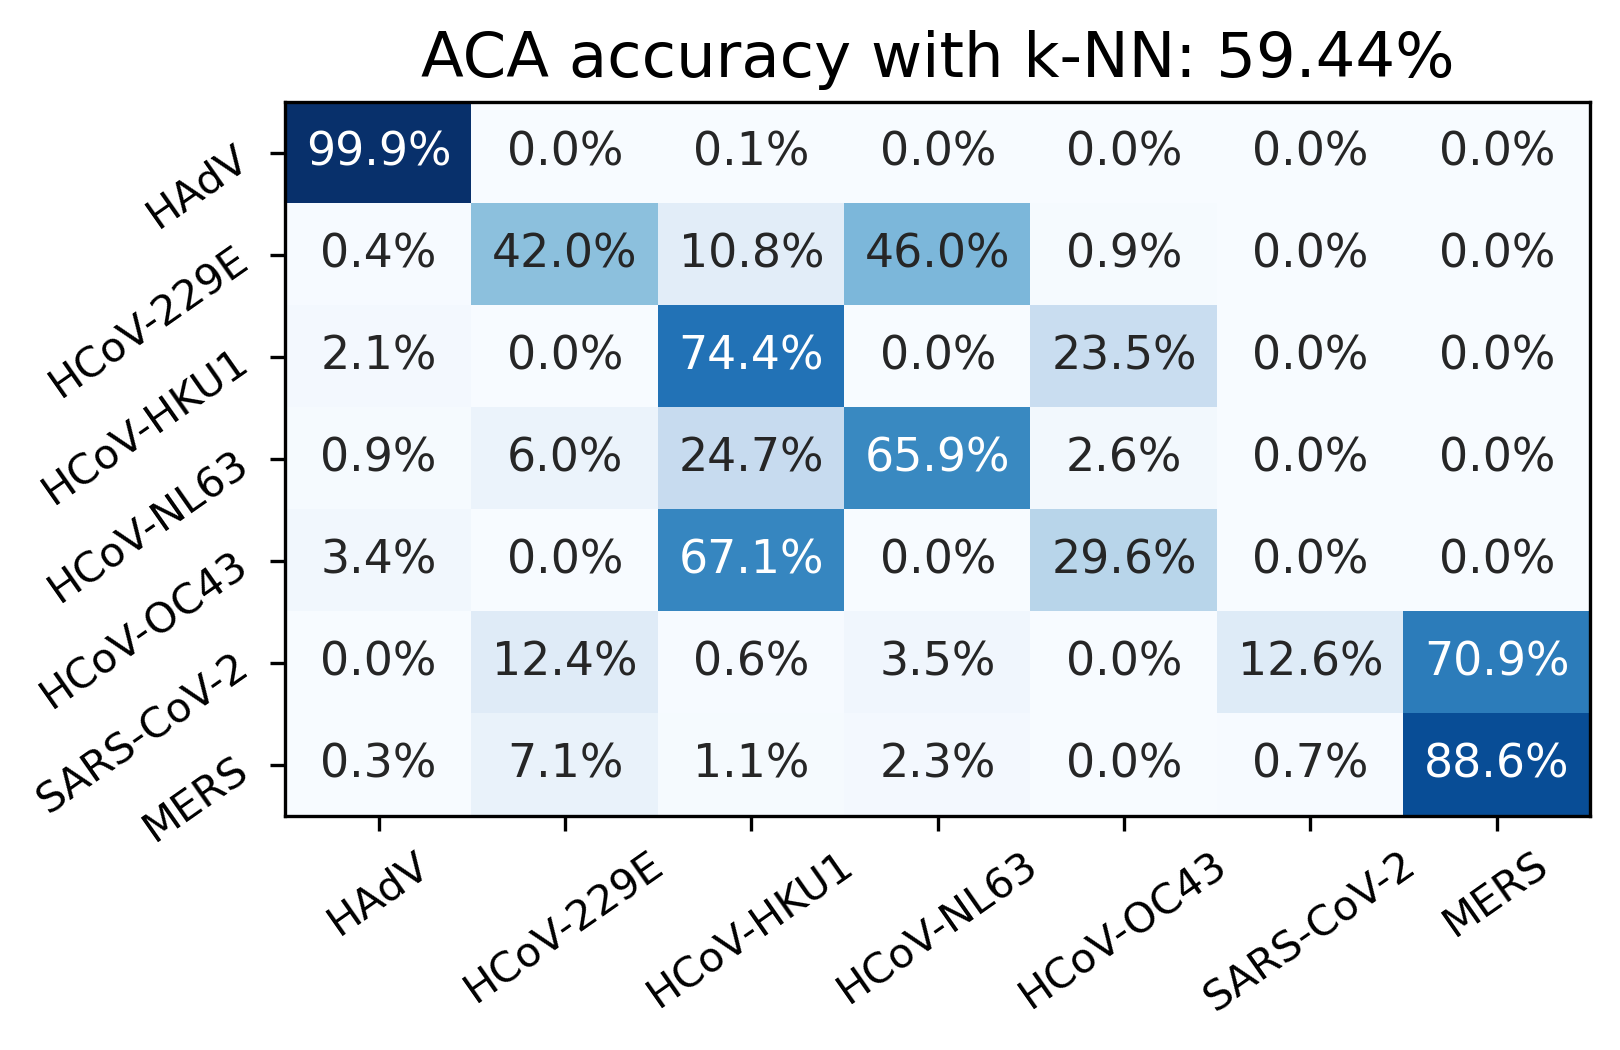

In [14]:
selected_pm = 'PM7.1593'
arr = np.array(confmatrix_dict[selected_pm])[0]
arr_perc = arr / arr.sum(axis=1).reshape(-1, 1)
accuracy = round(df_accuracy.loc[df_accuracy.index==selected_pm, "KNNraw_rb"].values[0]*100,2)

fig, ax = plt.subplots(1,1, figsize=(5.5,3.6), dpi=300)
ax.set_title(f'ACA accuracy with k-NN: {accuracy}%', size=15)

ax = sns.heatmap(arr_perc, annot=True, fmt='.1%', cmap='Blues', annot_kws={"fontsize":11}, cbar=None)

for _, spine in ax.spines.items():
    spine.set_visible(True)

ax.set_xticklabels(idx, rotation=35)
ax.set_yticklabels(idx, rotation=35)

plt.tight_layout()
plt.show()
directory = Path.cwd().parents[1] / "02_figures" / "Fig5"
fig.savefig(directory / f'confmatrix_{selected_pm}.pdf')
plt.close()

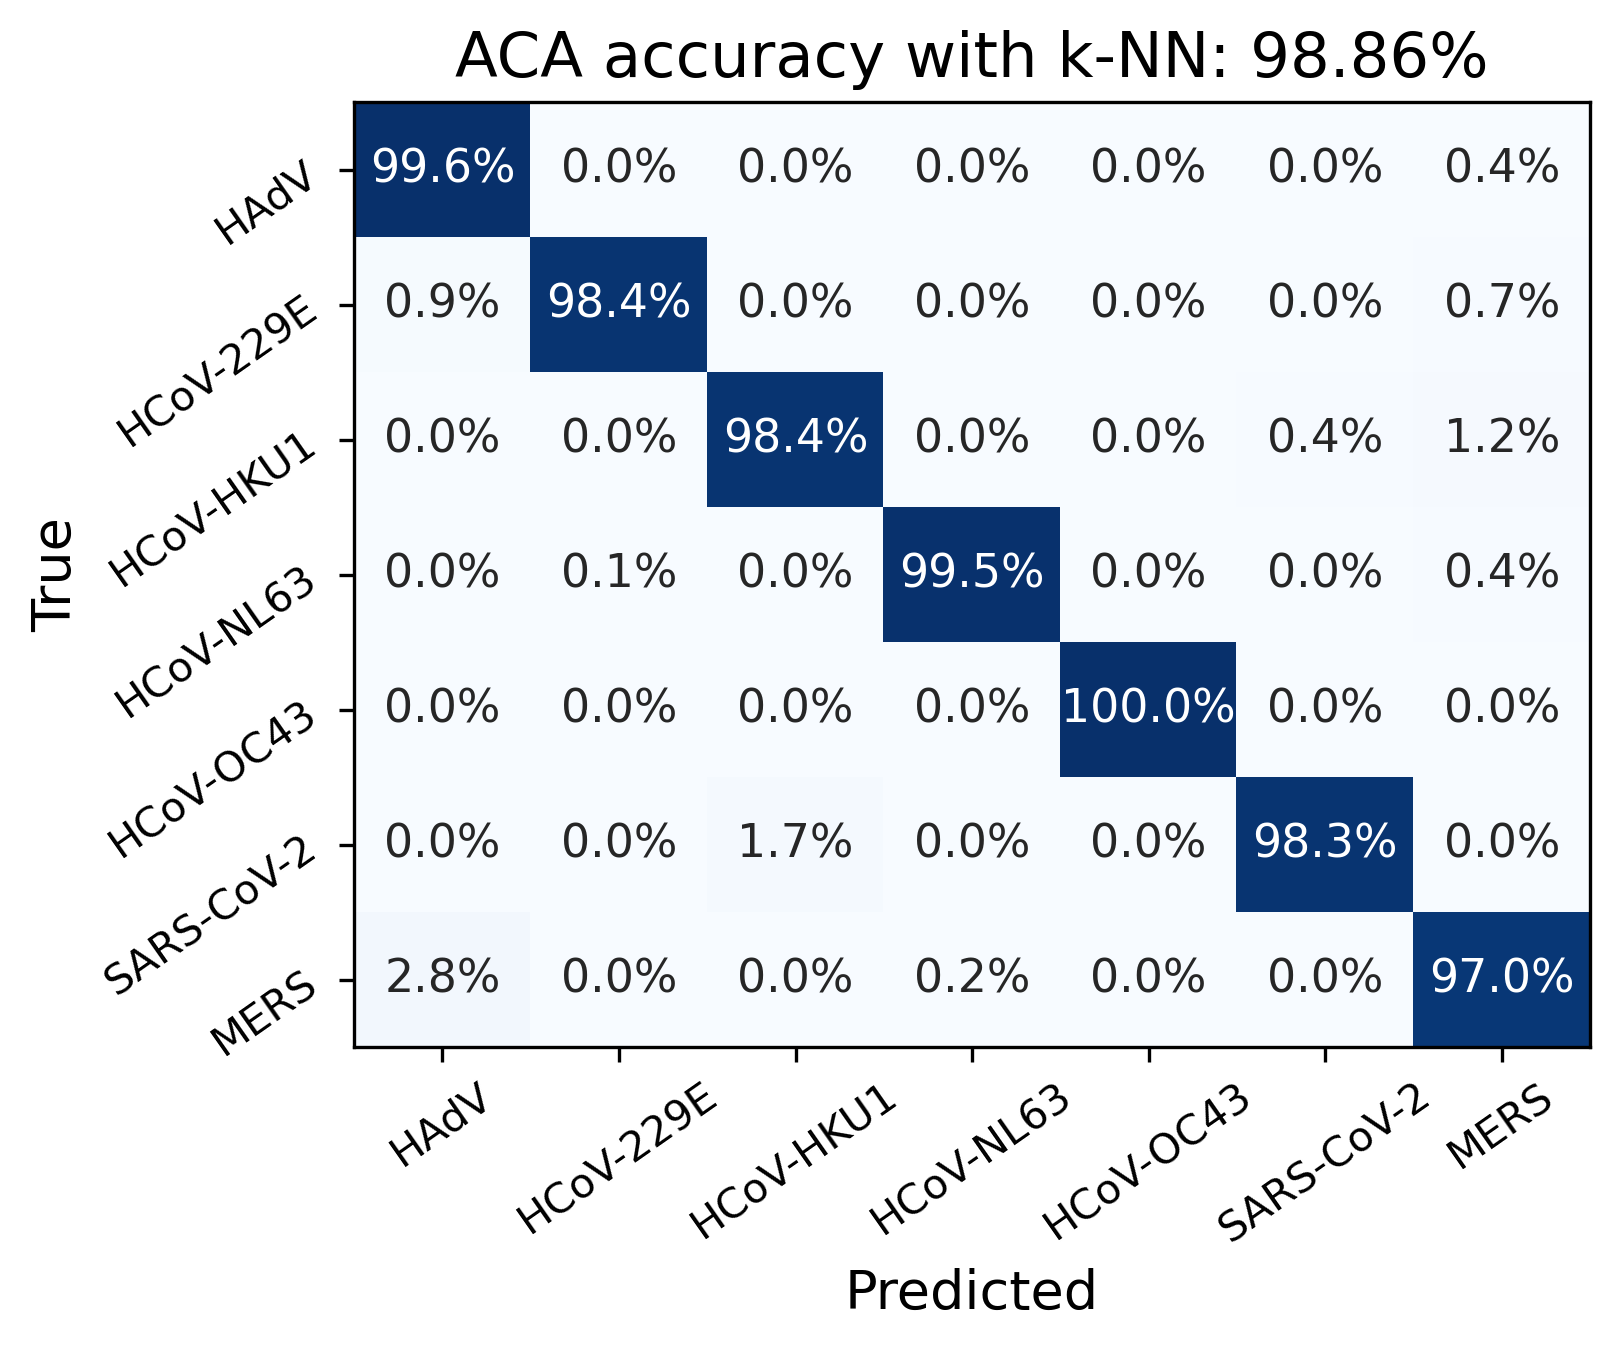

In [18]:
selected_pm = 'PM7.2151'
arr = np.array(confmatrix_dict[selected_pm])[0]
arr_perc = arr / arr.sum(axis=1).reshape(-1, 1)
accuracy = round(df_accuracy.loc[df_accuracy.index==selected_pm, "KNNraw_rb"].values[0]*100,2)

fig, ax = plt.subplots(1,1, figsize=(5.5,4.6), dpi=300)
ax.set_title(f'ACA accuracy with k-NN: {accuracy}%', size=15)

ax = sns.heatmap(arr_perc, annot=True, fmt='.1%', cmap='Blues', annot_kws={"fontsize":11}, cbar=None)

for _, spine in ax.spines.items():
    spine.set_visible(True)

ax.set_xticklabels(idx, rotation=35)
ax.set_yticklabels(idx, rotation=35)
ax.set_xlabel('Predicted', size=13)
ax.set_ylabel('True', size=13)


plt.tight_layout()
plt.show()
directory = Path.cwd().parents[1] / "02_figures" / "Fig5"
fig.savefig(directory / f'confmatrix_{selected_pm}_funding.pdf')
plt.close()

# CORRELATION VISUALIZATION

## Read data

In [15]:
curve_type_dict = {0: "raw_rb", 
                   1: "norm_curve",
                   2: "fitted_param",
                   3: "fitted_curve",
                   4: "norm_fitted_param",
                   5: "norm_fitted_curve",
                   6: 'c_param',
                   7: 'norm_c_param'}

In [16]:
# select the curve types based on the above dictionary information

selected_curve = 6
CURVE_TYPE = curve_type_dict[selected_curve]

In [17]:
# select the combination: all or selected?

# COMBO_TYPE = 'all'
COMBO_TYPE = 'selected'

In [18]:
df_score_singleplex_temp = pd.read_csv(f'{data_selected_path}/score_data/score_{CURVE_TYPE}_singleplex_{COMBO_TYPE}.csv', index_col = 0)
df_score_multiplex_temp = pd.read_csv(f'{data_selected_path}/score_data/score_{CURVE_TYPE}_multiplex_{COMBO_TYPE}.csv', index_col = 0)

df_score_singleplex = df_score_singleplex_temp[df_score_singleplex_temp['PrimerMix'].isin(df_accuracy.index)]
df_score_multiplex = df_score_multiplex_temp[df_score_multiplex_temp['PrimerMix'].isin(df_accuracy.index)]

In [19]:
df_score_multiplex.head(3)

,PrimerMix,Assay1,Assay2,Assay3,Assay4,Assay5,Assay6,Assay7,Distance1,MDistance1,...,Distance19,MDistance19,Distance20,MDistance20,Distance21,MDistance21,mean,min,mod_mean,mod_min
0,PM7.1176,ADE_HEX_06,C22_N_01,CHK_N_02,CNL_N_01,COC_N_02,COV_N_03,MER_N_04,0.102348,5.551582,...,0.034129,2.375481,0.098609,6.402245,0.064480,6.282354,0.100566,0.001988,6.637542,0.269527
1,PM7.1191,ADE_HEX_06,C22_N_01,CHK_N_02,CNL_N_02,COC_N_01,COV_N_01,MER_N_03,0.109210,20.499555,...,0.063911,8.830282,0.046631,8.474048,0.110543,16.634173,0.107136,0.017893,13.711036,3.351361
2,PM7.1286,ADE_HEX_06,C22_N_01,CHK_N_02,CNL_N_04,COC_N_04,COV_N_01,MER_N_02,0.074932,5.304269,...,0.294621,18.471874,0.394640,21.542498,0.100019,9.811668,0.187916,0.003204,11.554508,0.181183


## Accuracies Boxplot

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
from statannot import add_stat_annotation

In [21]:
df_box = loadfunc.get_pm_accuracy_based_on_rank(data_selected_path, combo_dict, df_accuracy)

pos_list = []
mean_list = []
std_list = []

for i, (pos, df_) in enumerate(df_box.groupby('Position')):

    m = df_['KNNraw_rb'].mean()
    std = df_['KNNraw_rb'].std()
    
    pos_list.append(pos)
    mean_list.append(m) 
    std_list.append(std)
    
df_position_mean_std = pd.DataFrame({"position" : pos_list,
                                     "average" : mean_list,
                                     "std" : std_list})

df_position_mean_std.round({'average': 2, 'std': 2})

,position,average,std
0,bottom_six,0.76,0.13
1,middle_six,0.89,0.09
2,top_mean,0.85,0.12
3,top_min,0.91,0.06
4,top_six,0.95,0.04


top_min v.s. top_six: t-test independent samples with Bonferroni correction, P_val=1.000e+00 stat=-1.149e+00
top_mean v.s. top_six: t-test independent samples with Bonferroni correction, P_val=3.139e-01 stat=-2.059e+00
middle_six v.s. top_six: t-test independent samples with Bonferroni correction, P_val=6.614e-01 stat=-1.497e+00
bottom_six v.s. top_six: t-test independent samples with Bonferroni correction, P_val=2.536e-02 stat=-3.439e+00


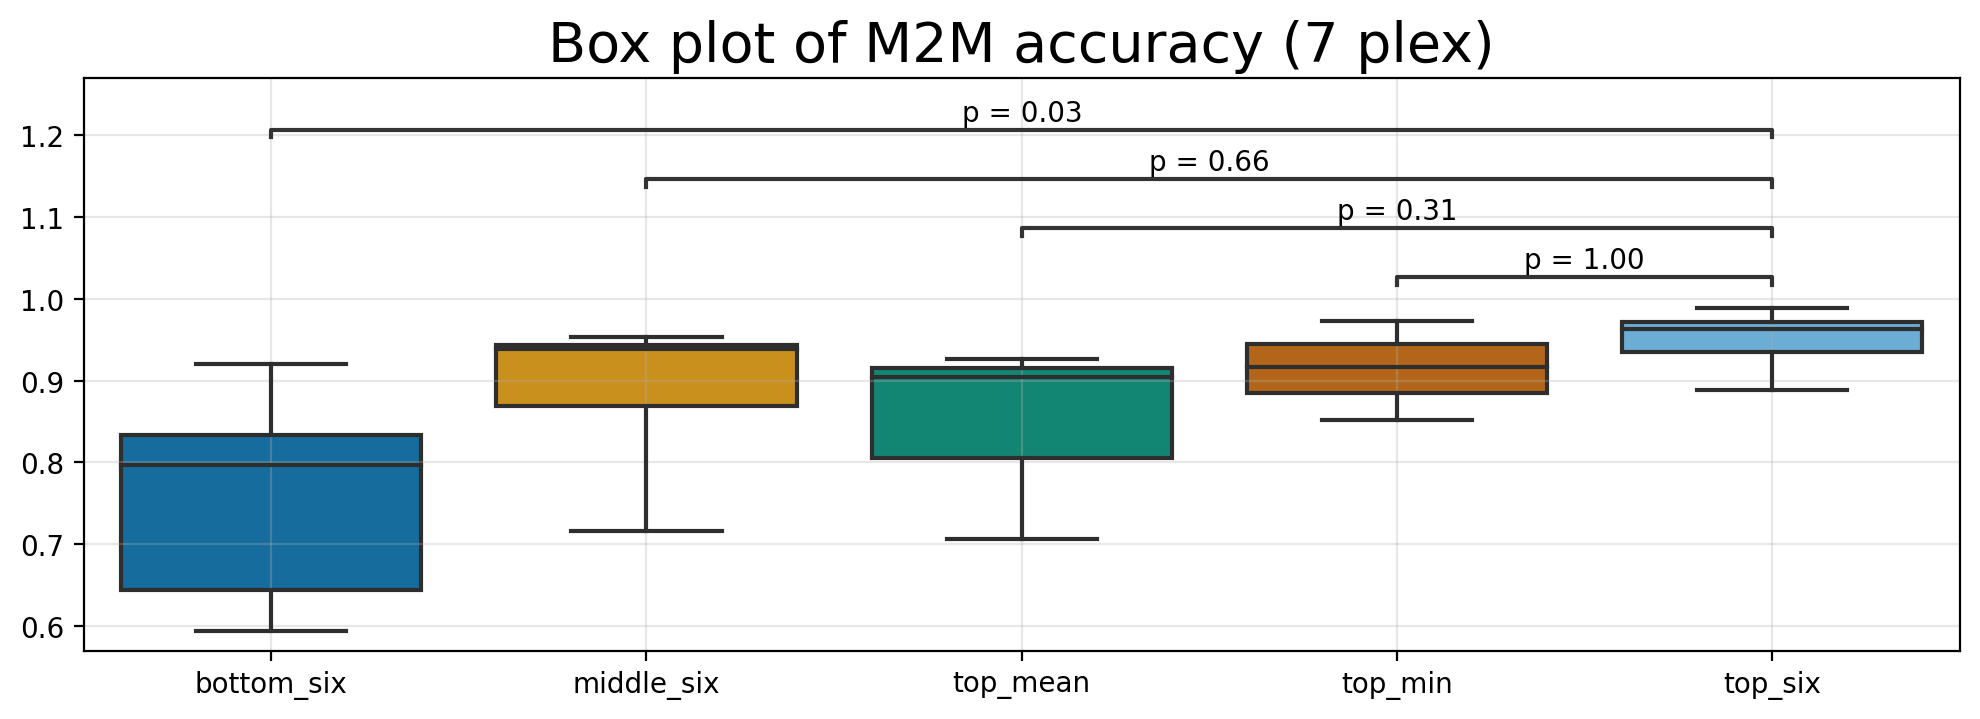

In [22]:
fig, ax = plt.subplots(1, 1, figsize=(10, 3.7), dpi=200)
ax = sns.boxplot(x='Position', y='KNNraw_rb', data=df_box, whis=3)

# sns.set(style="whitegrid")

ax.set_xlabel('Primer Mix Rank based on C parameters', size=15)
ax.set_xlabel('', size=15)
# ax.set_xticklabels([])

ax.set_ylabel(f'M2M accuracy (raw)', size=15)
ax.set_ylabel(f'', size=15)
ax.set_ylim(0.57, 1.05)

ax.set_title('Box plot of M2M accuracy (7 plex)', size=20)
ax.grid(alpha=0.3)


add_stat_annotation(ax, data=df_box, x='Position', y='KNNraw_rb',
                    box_pairs=[("bottom_six", "top_six"), ("middle_six", "top_six"), ("top_mean", "top_six"), (("top_min", "top_six"))],
                    test='t-test_ind', text_format='simple', loc='inside', verbose=2)

# plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))

plt.tight_layout()
plt.show()

## Figure for the paper

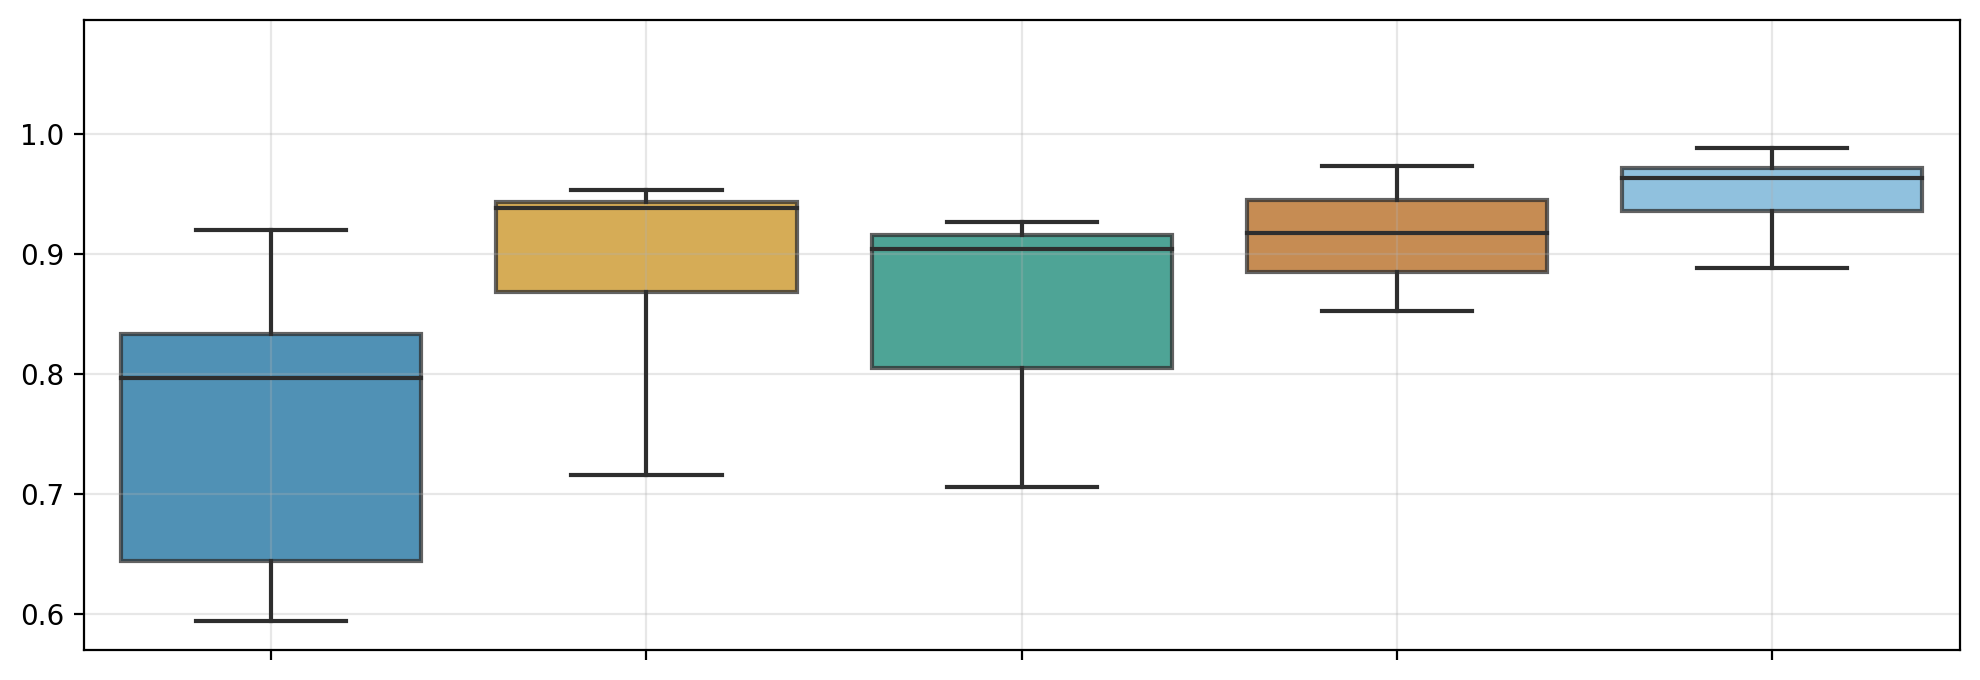

In [23]:
fig, ax = plt.subplots(1, 1, figsize=(10, 3.5), dpi=200)
ax = sns.boxplot(x='Position', y='KNNraw_rb', data=df_box, whis=3, boxprops=dict(alpha=.75))

# ax.set_xlabel('Primer Mix Rank based on C parameters', size=15)
ax.set_xlabel('', size=15)
ax.set_xticklabels([])

ax.set_ylim(0.57, 1.095)
# ax.set_ylabel(f'M2M accuracy (raw)', size=15)
ax.set_ylabel(f'', size=15)

# ax.set_title('Box plot of M2M accuracy (7 plex)', size=20)
ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()
directory = Path.cwd().parents[1] / "02_figures" / "figure5"
# fig.savefig(directory / f'boxplot_accuracy.pdf')
# plt.close()

# TSNE PLOTTING

In [24]:
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score

# %matplotlib notebook

In [25]:
combo_dict = {0: 'bottom_six',
              1: 'middle_six',
              2: 'top_six',
              3: 'top_mean',
              4: 'top_min'}

combo_group_id = [0, 2]
df_combination = loadfunc.load_selected_combo(data_selected_path, combo_group_id, combo_dict)
df_combination = df_combination[~df_combination.index.isin(['PM7.2299'])]

In [26]:
colormap = [f'C0{i}' for i in range(7)]
colormap

['C00', 'C01', 'C02', 'C03', 'C04', 'C05', 'C06']

## Top Combination

Primer: PM7.2151
Silhouette_score: 0.67


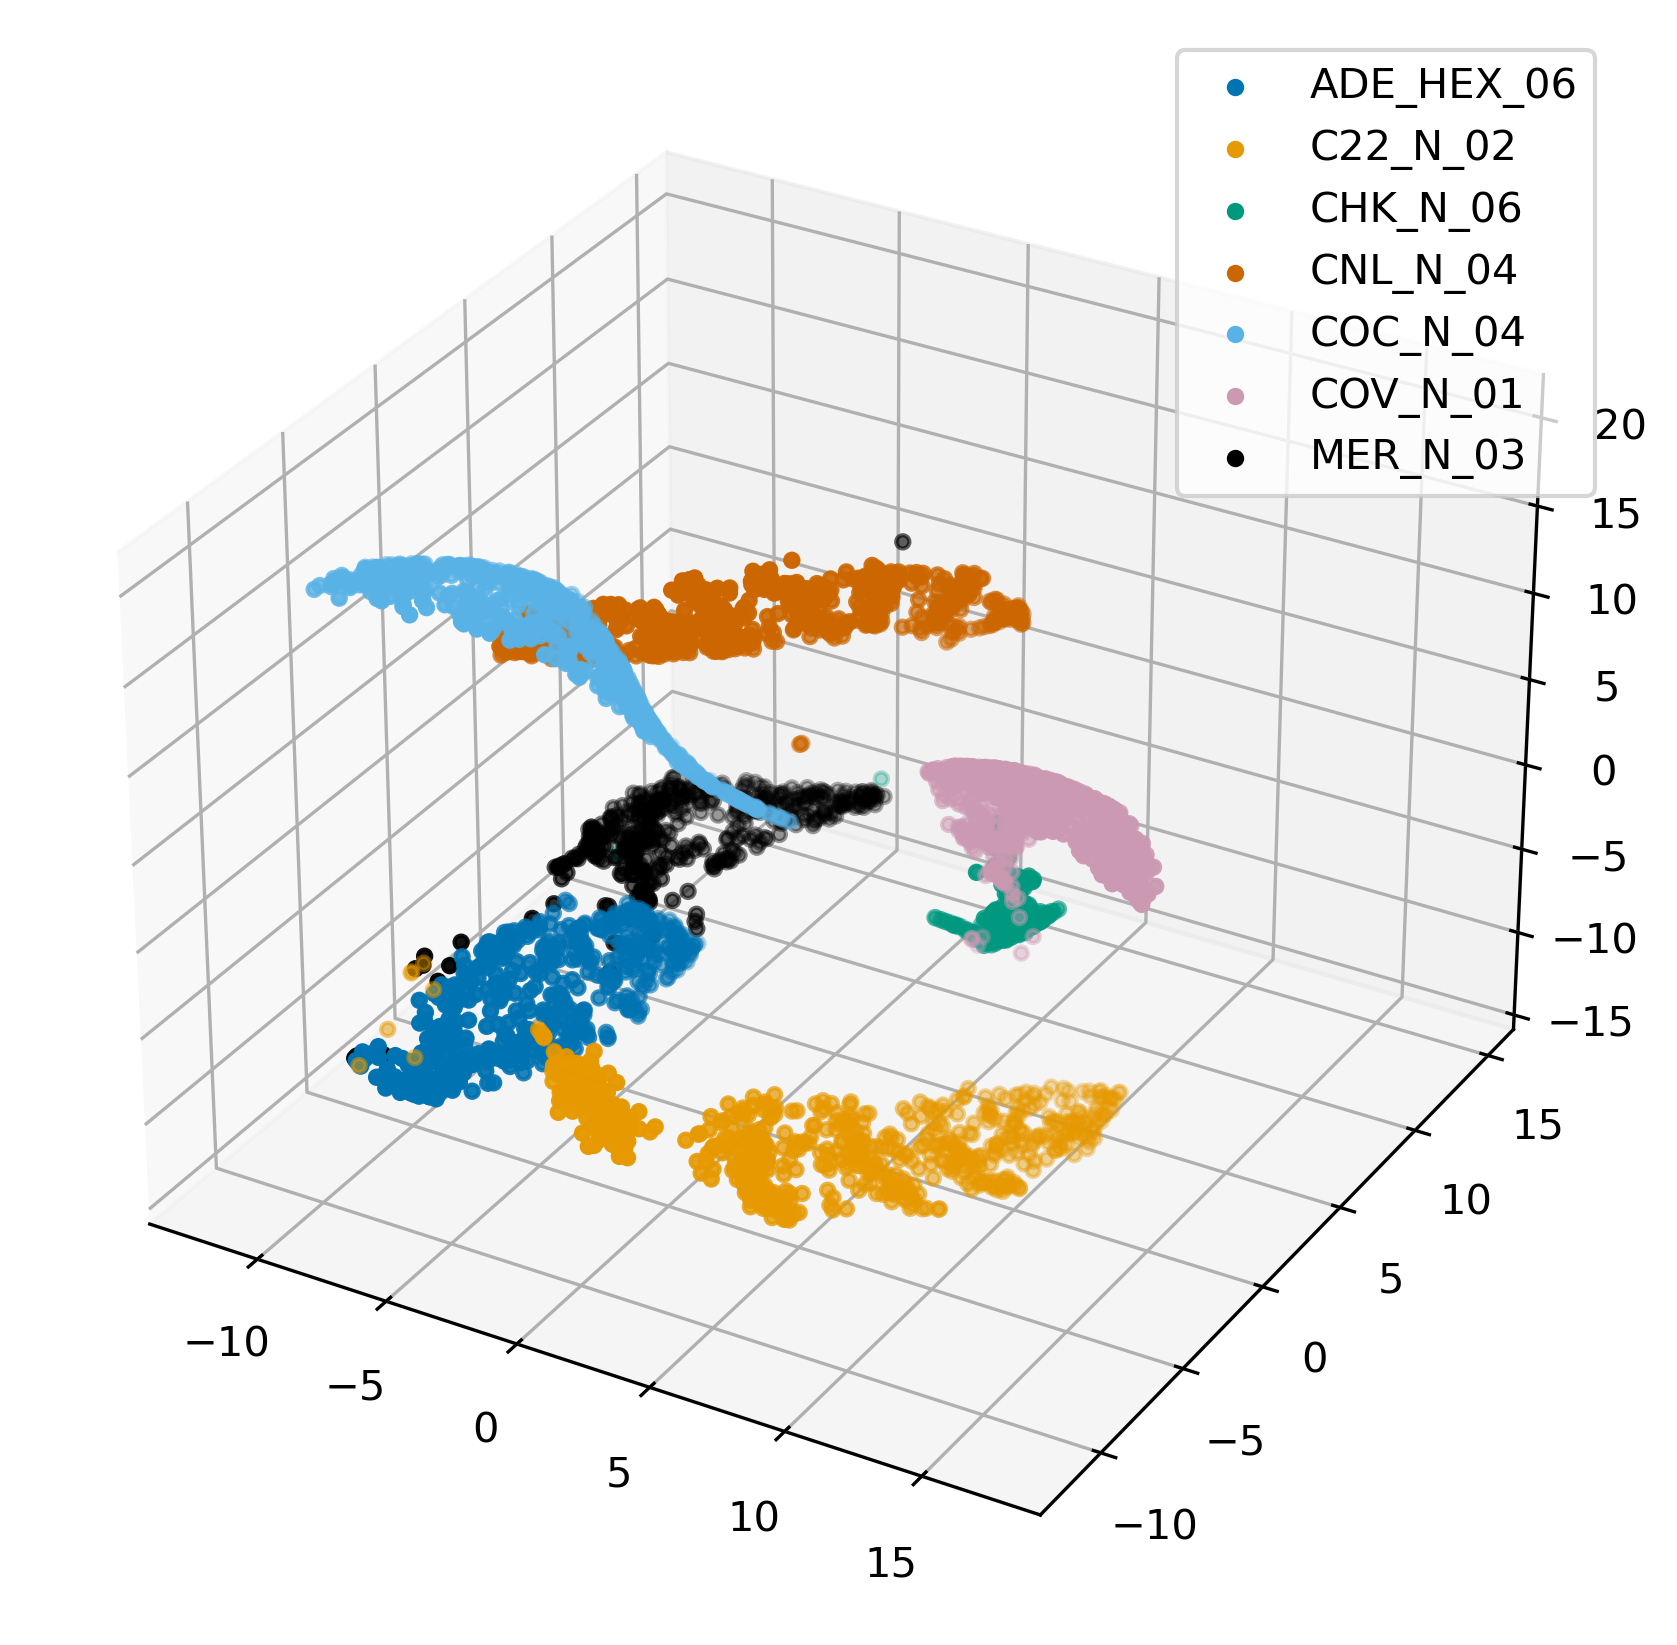

In [28]:
# chose top assay
df_tsne_plot = df_test.loc[df_test['PrimerMix'].isin(['PM7.2151'])]

for primer, df in df_tsne_plot.groupby('PrimerMix'):
    
    print(f'Primer: {primer.upper()}')
    
    X = df.iloc[:, 6:]
    y = df.loc[:, 'Assay']
    
    tsne = TSNE(n_components=3, perplexity=100, random_state=0)
    X_2d = tsne.fit_transform(X)
    
    target_ids = y.unique()
    
    score = silhouette_score(X, y, metric = 'sqeuclidean')
    print(f'Silhouette_score: {round(score, 2)}')
    
    # plotting
    fig = plt.figure(figsize=(7,7), dpi=300)
    ax = fig.add_subplot(projection='3d')

    for i, c, label in zip(target_ids, colormap, y.unique()):
        ax.scatter(X_2d[y == i, 0], X_2d[y == i, 1], X_2d[y == i, 2], c=c, s=10, label=label)

    plt.legend()
    plt.grid(alpha = 0.3)
    plt.show()
#     fig.savefig(directory / f'3D_TSNE_PM7-2151.pdf')
#     plt.close()

## Bottom Combination

Primer: PM7.1593
Silhouette_score: 0.12


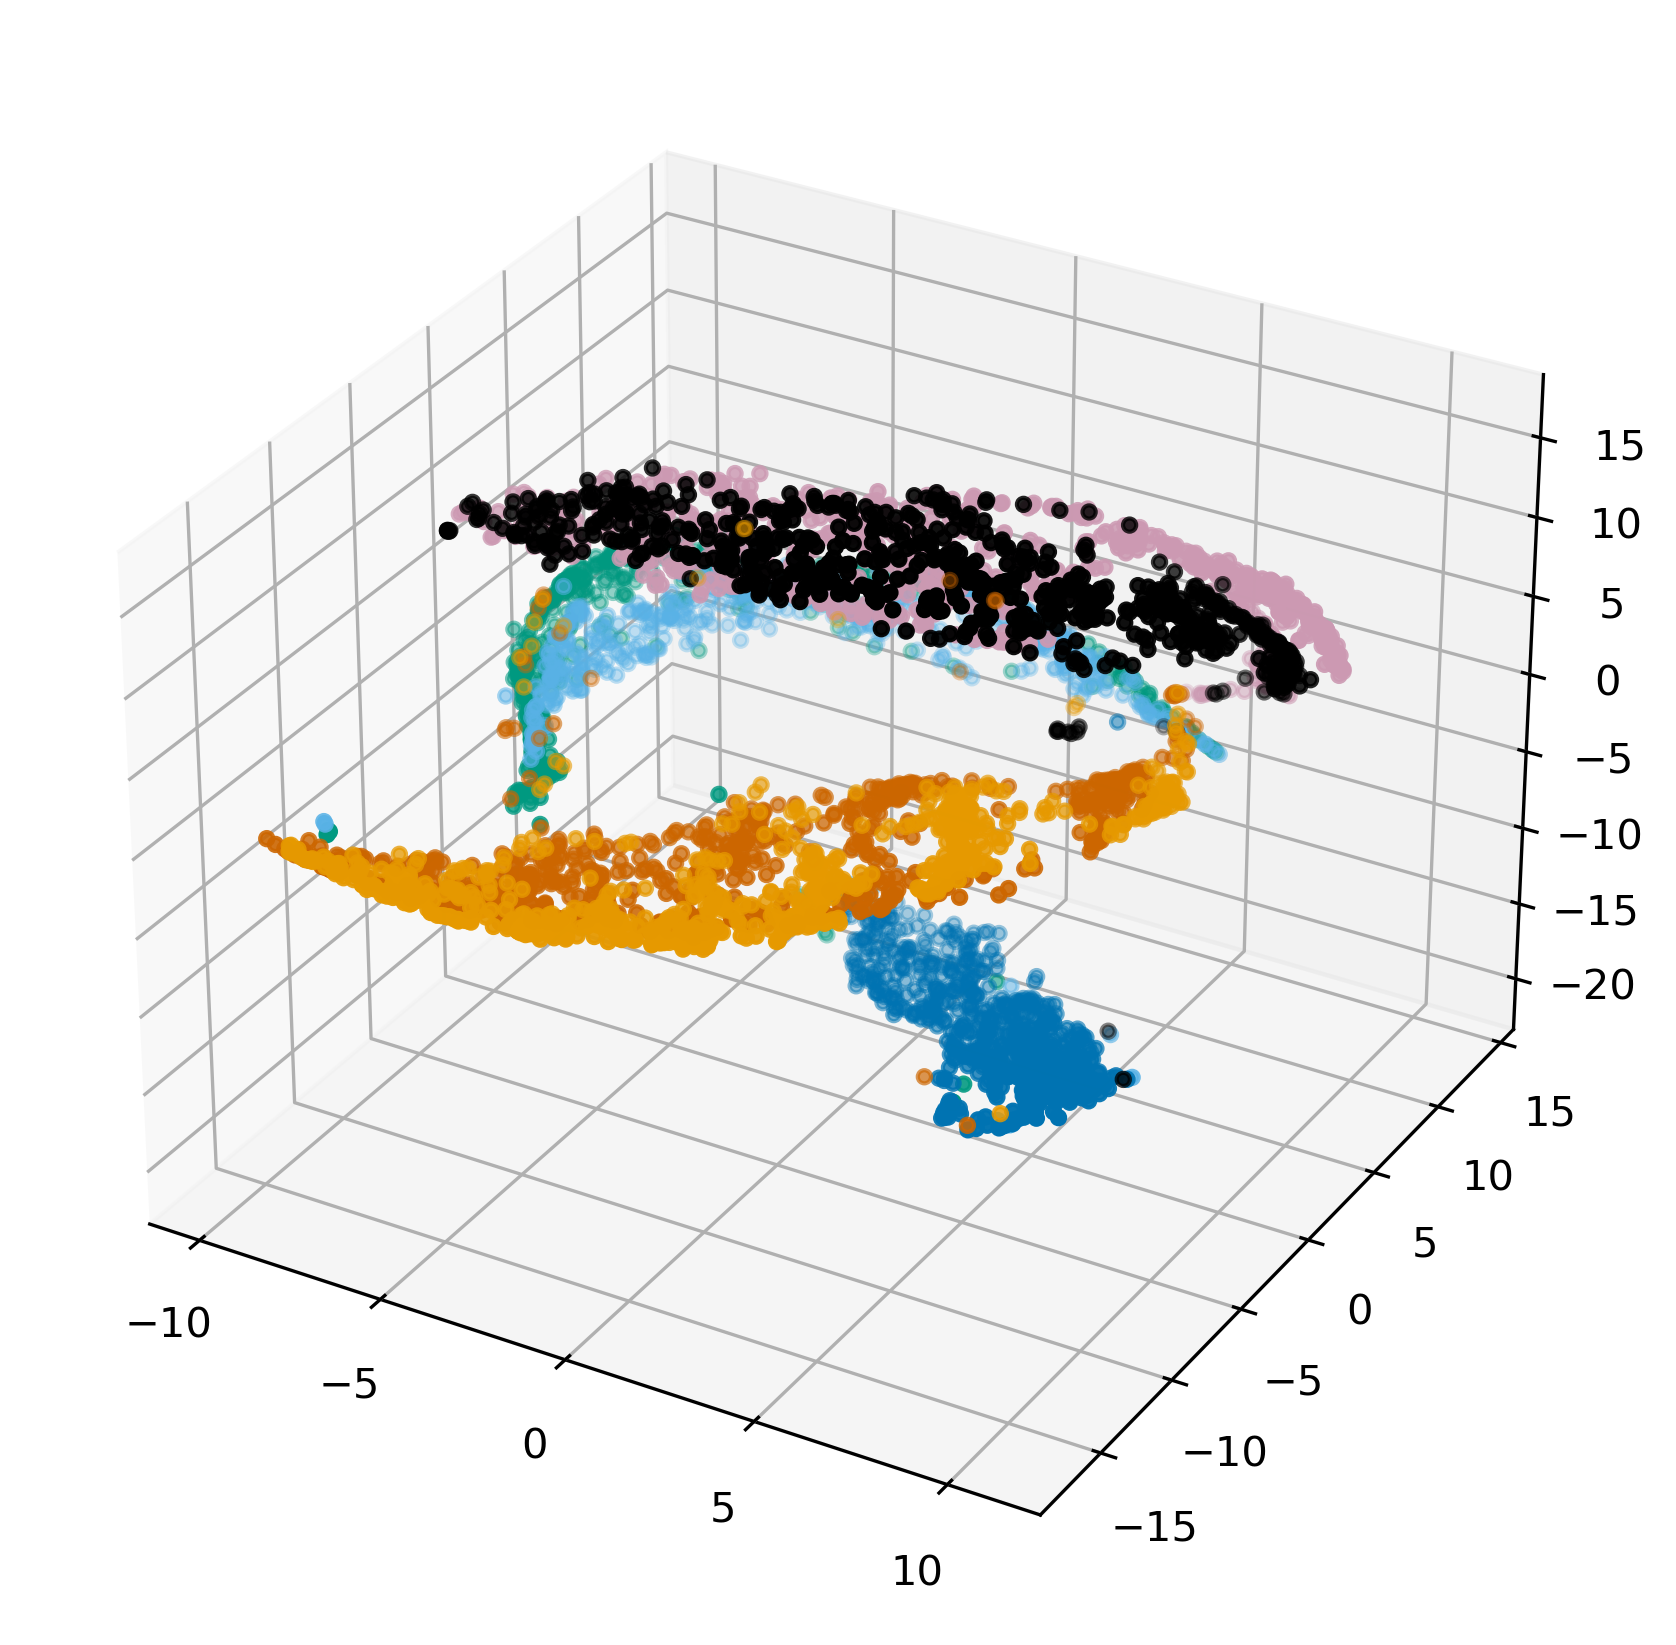

In [47]:
df_tsne_plot = df_test.loc[df_test['PrimerMix'].isin(['PM7.1593'])]

for primer, df in df_tsne_plot.groupby('PrimerMix'):
    
    print(f'Primer: {primer.upper()}')
    
    X = df.iloc[:, 6:]
    y = df.loc[:, 'Assay']
    
    tsne = TSNE(n_components=3, perplexity=100, random_state=0)
    X_2d = tsne.fit_transform(X)
    
    target_ids = y.unique()
    
    score = silhouette_score(X, y, metric = 'sqeuclidean')
    print(f'Silhouette_score: {round(score, 2)}')
    
    # plotting
    fig = plt.figure(figsize=(7,7), dpi=300)
    ax = fig.add_subplot(projection='3d')

    for i, c, label in zip(target_ids, colormap, y.unique()):
        ax.scatter(X_2d[y == i, 0], X_2d[y == i, 1], X_2d[y == i, 2], c=c, s=10, label=label)

    plt.legend().set_visible(False)
    plt.grid(alpha = 0.3)
    plt.show()
    fig.savefig(directory / f'3D_TSNE_PM7-1593.pdf')
    plt.close()